# Start Ups

**Build a linear regression model to predict revenue from 50 start ups data**

From: https://www.udemy.com/machinelearning

In [269]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [228]:
def shapiro_wilks_test(data):
    '''
        Normality test
        Params: <list>
        Returns a list of: statistic, p-value
    '''
    from scipy.stats import shapiro
    stat, p = shapiro(data)
    return [stat, p]

def test_H0(p_value):
    alpha = 0.05
    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0 at alpha={:.3f})'.format(alpha))
    else:
        print('Sample does not look Gaussian (reject H0 at alpha={:.3f})'.format(alpha))
    print('')

In [273]:
def compute_vif(dtf):
    """
    Implementation:
        https://etav.github.io/python/vif_factor_python.html (code below)

    Interpretation: 
        https://www.displayr.com/variance-inflation-factors-vifs/
        A value of 1 means that the predictor is not correlated with other variables.
        The higher the value, the greater the correlation of the variable with other variables.
        Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values
        of 10 or more being regarded as very high. These numbers are just rules of thumb.
        Higher values signify that it is difficult to impossible to assess accurately the contribution
        of predictors to a model.

    Workarounds: 
        https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
        If multicollinearity is found in the data, one possible solution is to center the data.
        To center the data, subtract the mean score from each observation for each independent variable.
        However, the simplest solution is to identify the variables causing multicollinearity
        issues (i.e., through correlations or VIF values) and removing those variables from the regression.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif_dtf = pd.DataFrame()
    vif_dtf["features"] = dtf.columns
    vif_dtf['vif_factors'] = [variance_inflation_factor(dtf.values, i) for i in range(dtf.shape[1])]

    return vif_dtf

In [30]:
dtf = pd.read_csv('50_Startups.csv')
names = {
    'R&D Spend': 'rd_spend',
    'Administration': 'admin_spend',
    'Marketing Spend': 'marketing_spend',
    'State': 'state',
    'Profit': 'profit'
}
dtf.rename(columns=names, inplace=True)
print(dtf.head())
print(dtf.shape)

    rd_spend  admin_spend  marketing_spend       state     profit
0  165349.20    136897.80        471784.10    New York  192261.83
1  162597.70    151377.59        443898.53  California  191792.06
2  153441.51    101145.55        407934.54     Florida  191050.39
3  144372.41    118671.85        383199.62    New York  182901.99
4  142107.34     91391.77        366168.42     Florida  166187.94
(50, 5)


In [260]:
''' Functions for generating automatically scatter plots from a dataframe '''

def _compute_multiplot_rows(lst):
    '''
        Computes the rows required to generate a multiplot figure of N rows and 2 columns. 
        lst: list of independent variable columns names in the dataframe (eg. ['xA', 'xB', 'xN'])
    '''
    COL_NUMBER = 2
    
    _lst_len = len(lst)
    _division = int(_lst_len/COL_NUMBER)
    _reminder = _lst_len%COL_NUMBER
    
    if _division == 0:
        return 1
    
    if _reminder == 0:
        return _division
    
    if _reminder > 0:
        return _division + 1
    

def get_rand_rgb_color(col_numb):
    return [np.random.rand(col_numb)]

    
def show_multi_plots(dtf, xy_dct, plt_type):
    '''
    Description
    -----------
        Generates a figure with multiple scatter plots.

    Parameters
    ----------
        dtf: A dataframe containing the independent and dependent variables.
        xy_dct: dictionary with keys x and y, specifying the column names of independent
                and dependent variables respectively.
            Example: { 'x': ['col_xA','col_xB','col_xC'], 'y': 'col_y'}
        plt_type: plot type [scatter | hist]
            
            
    TODO
    ----
        Fix a function fail/error at instruction "axs[r, c].scatter" when passed a list of two colums to plot 
        from dataframe.
    '''
    COL_NUMBER = 2

    x_idx = 0
    calpha = .7
    y_name = xy_dct['y']
    x_lst_len = len(xy_dct['x'])
    rows_number = _compute_multiplot_rows(xy_dct['x'])
    
    fig, axs = plt.subplots(rows_number, 2, figsize=(12, 12))

    for r in range (0, rows_number):
        for c in range (0, COL_NUMBER):
            if x_idx == x_lst_len: 
                break
            x_name = xy_dct['x'][x_idx]
            
            if plt_type == 'scatter':
                axs[r, c].scatter(dtf[x_name], dtf[y_name], c=get_rand_rgb_color(x_lst_len), alpha=calpha)
                axs[r, c].set_ylabel(y_name, fontsize=10)
                axs[r, c].set_xlabel(x_name, fontsize=10)
                
            if plt_type == 'hist':
                axs[r, c].hist(dtf[x_name], color=get_rand_rgb_color(x_lst_len), alpha=calpha)
            
            axs[r, c].set_title(x_name, fontsize=12)
            x_idx += 1
    
    plt.show()

### Plot continous independent variables vs dependent

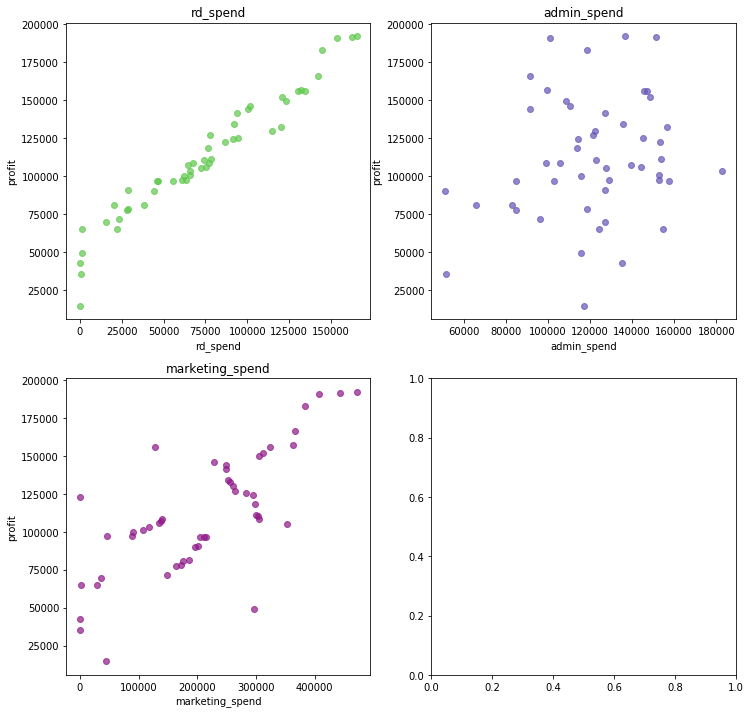

rd_spend has a very strong linear relationship to profit, marketing_spend also shows a reasonable correlation, while admin_spend do not seems to have a simple linear relationship to revenue


In [261]:
xy_dct = { 'x': ['rd_spend','admin_spend','marketing_spend'], 'y': 'profit'}
show_multi_plots(dtf, xy_dct, 'scatter')

print('''rd_spend has a very strong linear relationship to profit, marketing_spend also shows a reasonable correlation, while admin_spend do not seems to have a simple linear relationship to revenue''')

### Plot continous variables vs categorical

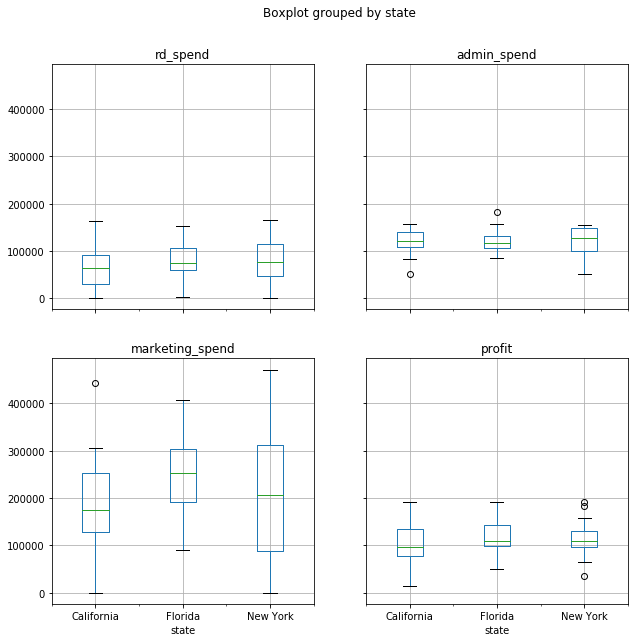

In [218]:
# cols = ['rd_spend','admin_spend']
feats = ['rd_spend','admin_spend','marketing_spend', 'profit']

bxplots = dtf.boxplot(column=feats, by='state', layout=(2,2), figsize=(10,10))

### Are continous variables normal?

In [241]:
feat = ['rd_spend', 'admin_spend', 'marketing_spend', 'profit']

for f in feat:
    sw_stat, p_value = shapiro_wilks_test(dtf[f])
    print('{} sw_stat={:.3f}, p_value={:.3f}'.format(f, sw_stat, p_value))
    test_H0(p_value)    

rd_spend sw_stat=0.967, p_value=0.180
Sample looks Gaussian (fail to reject H0 at alpha=0.050)

admin_spend sw_stat=0.970, p_value=0.237
Sample looks Gaussian (fail to reject H0 at alpha=0.050)

marketing_spend sw_stat=0.974, p_value=0.345
Sample looks Gaussian (fail to reject H0 at alpha=0.050)

profit sw_stat=0.985, p_value=0.767
Sample looks Gaussian (fail to reject H0 at alpha=0.050)



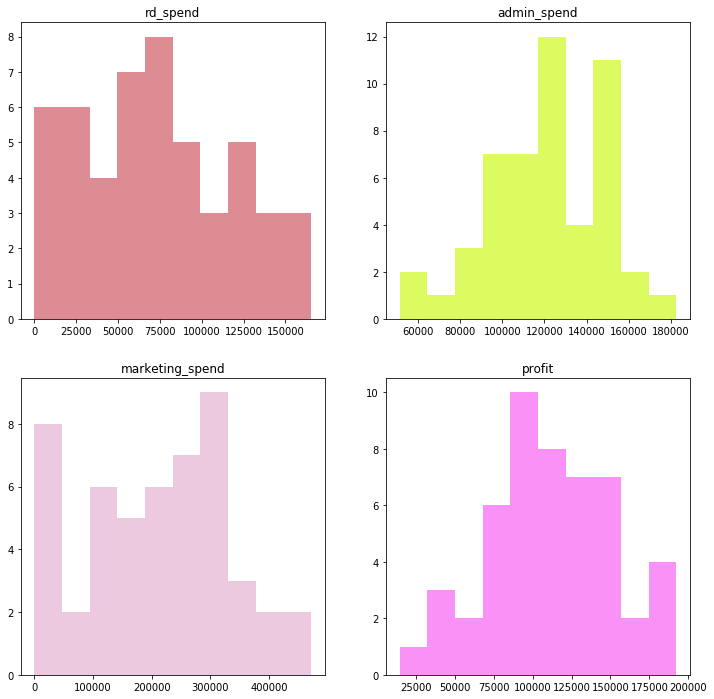

' Both the dependent and independent variables adhere to normality. A good start for building a linear model '

In [267]:
xy_dct = { 'x': ['rd_spend','admin_spend','marketing_spend', 'profit'], 'y': ''}
show_multi_plots(dtf, xy_dct, 'hist')

''' Both the dependent and independent variables adhere to normality. A good start for building a linear model '''

### Exploring collinearity among continous independent variables. 

In [275]:
vif_dtf = compute_vif(dtf[['rd_spend','admin_spend','marketing_spend']])
vif_dtf

''' VIF results support what was previously observed in the scatter plots, rd_spend and marketing_spend share collinearity. However we will not remove any of them, since we want to test a step-wise model building'''

' VIF results support what was previously observed in the scatter plots, rd_spend and marketing_spend share collinearity. However we will not remove any of them, since we want to test a step-wise model building'

### Step wise model building with OLS